In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import genfromtxt

In [64]:
plt.rcParams['figure.dpi'] = 150

## Matrix

In [79]:
class LinearRegression:

    def __init__(self, init_theta=None, alpha=0.01, n_iter=100):
        '''
        Constructor
        '''
        self.alpha = alpha
        self.n_iter = n_iter
        self.theta = init_theta
        self.JHist = None

    def gradientDescent(self, X, y, theta):
        '''
        Fits the model via gradient descent
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
            theta is a d-dimensional numpy vector
        Returns:
            the final theta found by gradient descent
        '''
        n,d = X.shape
        self.JHist = []
        sum = 0
        for i in range(self.n_iter):
            self.JHist.append((self.computeCost(X, y, theta), theta))
#             print("Iteration: ", i+1, " Cost: ", self.JHist[i][0], " Theta: ", theta)
            theta = theta - (self.alpha / n * ((-2 * np.matmul(X.T, y)) + (2 * np.matmul(np.matmul(X.T, X), theta))))
        print(" Cost: ", self.JHist[i][0], " Theta: ", theta)
        return theta

    def computeCost(self, X, y, theta):
        '''
        Computes the objective function
        Arguments:
          X is a n-by-d numpy matrix
          y is an n-dimensional numpy vector
          theta is a d-dimensional numpy vector
        Returns:
          a scalar value of the cost  
              ** make certain you don't return a matrix with just one value! **
        '''
        n,d = X.shape
        cost = 1 / 2 / n * np.matmul((np.matmul(X, theta) - y).T, (np.matmul(X, theta) - y))
        return cost[0, 0]
        # TODO: add objective (cost) equation here


    def fit(self, X, y):
        '''
        Trains the model
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
        '''
        n = len(y)
        n,d = X.shape
        if self.theta is None:
            self.theta = np.matrix(np.zeros((d,1)))
        self.theta = self.gradientDescent(X,y,self.theta)

    def predict(self, X):
        '''
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d numpy matrix
        Returns:
            an n-dimensional numpy vector of the predictions
        '''
        y_pred = np.matmul(X, self.theta)
        return y_pred
        # TODO:  add prediction function here


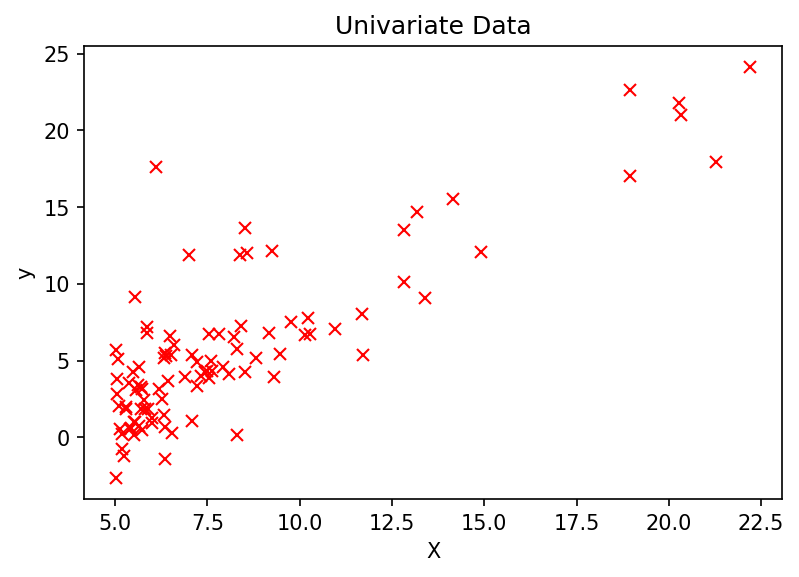

 Cost:  4.4772710405806855  Theta:  [[-3.83861532]
 [ 1.18729074]]


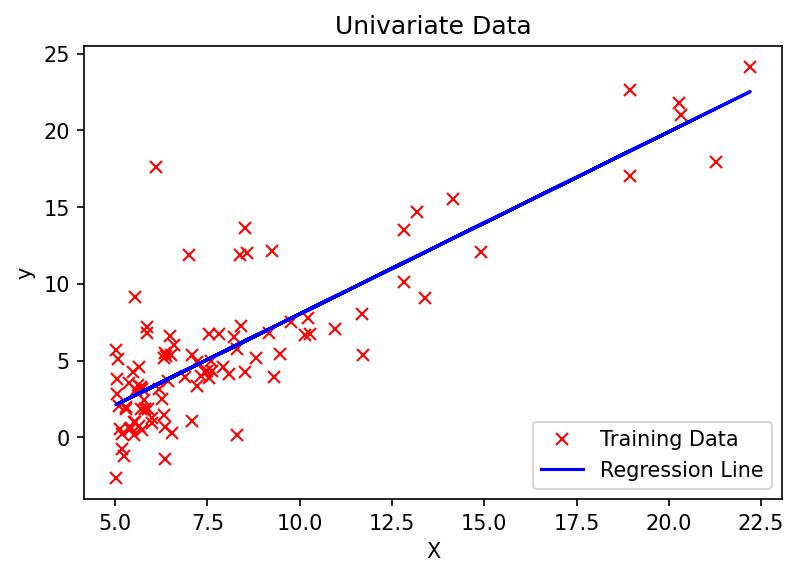

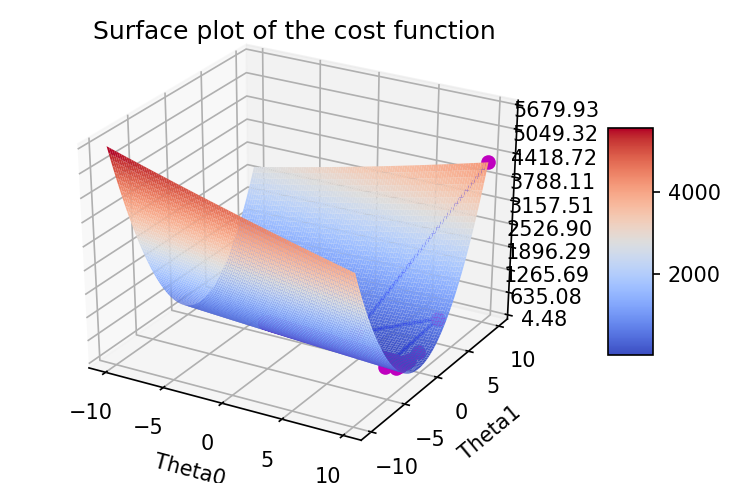

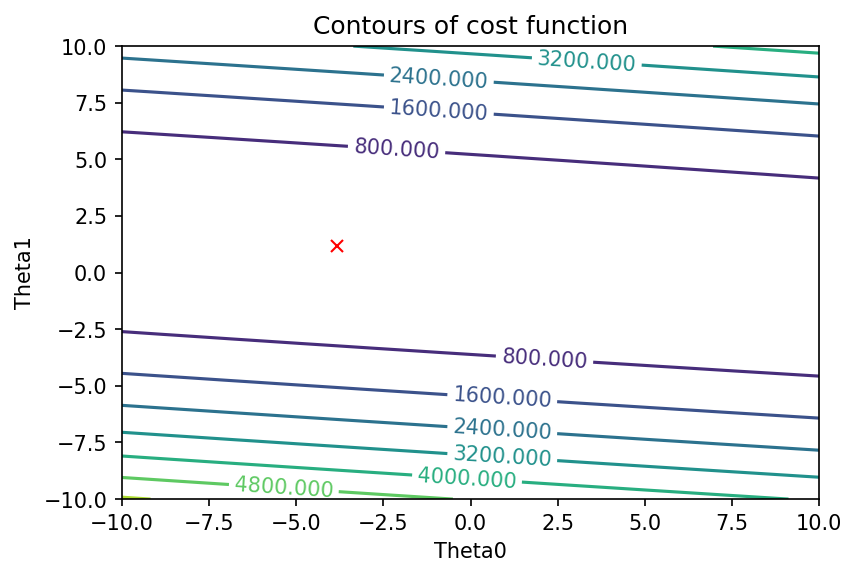

In [78]:
'''
    TEST SCRIPT FOR UNIVARIATE LINEAR REGRESSION
'''

import numpy as np

# Matplotlib provides matlab like plotting tools in python
import matplotlib.pyplot as plt


# All the modules needed for 3d surface plots
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


#------------------------------------------------------------------------------------------------
# Plotting tools already written for you.
# Feel free edit and experiment.
def plotData1DHelper(X, y):
    plt.clf()
    plt.title("Univariate Data")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.plot(X, y, 'rx', label='Training Data')


def plotData1D(X, y):
    '''
        This function is to plot y vs X where the number of predictors of X is 1.
        Input
        X - n*1 matrix or vector of length n
        y - n*1 matrix or vector of length n
        to_block - boolean flag which when set stops the program execution until the 
            plot is closed
    '''
    plotData1DHelper(X, y)
    plt.show()


def plotRegLine1D( lr_model, X, y):
    '''
        Plots the y vs X and also the regressed line according to the theta computed.
        Input
        X - n*2 matrix or vector of length n ( the second dimension is a column of ones for the bias term)
        y - n*1 matrix or vector of length n
        lr_model - linear regression trained model
    '''
    plotData1DHelper(X[:,1], y)
    plt.plot(X[:,1],X*lr_model.theta,'b-', label='Regression Line')
    plt.legend(loc='lower right')
    plt.show()


def visualizeObjective(lr_model,t1_vals,t2_vals, X, y):
    '''
        The function does the surface plot of the objective for a 
        univariate regression problem with a bias term, so over 2 parameters.
        Search over the space of theta1, theta2.
        
        It also plots the gradient descent steps as blue points on the surface plot.
        Finally it plots a contour plot of the same
        
        lr_model - object of class LinReg (already trained)
        t1_vals, t2_vals - values over which the objective function should be plotted
                        List of numbers
        X - n*2 matrix or vector of length n ( the second dimension is a column of ones for the bias term)
        y - n*1 matrix or vector of length n
    '''
    T1,T2 = np.meshgrid(t1_vals, t2_vals)
    n,p = T1.shape

    # Compute the objective function over the space
    Z = np.zeros(T1.shape)
    for i in range(n):
        for j in range(p):
            Z[i,j] = lr_model.computeCost(X,y, np.matrix([T1[i,j],T2[i,j]]).T )

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(T1, T2, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    fig.colorbar(surf, shrink=0.5, aspect=5)

    # If the history of the objective function plot the path taken by the gradient descent
    if lr_model.JHist !=None:

        for ii in range(len(lr_model.JHist)-1):
            t1 = lr_model.JHist[ii][1].tolist()
            t2 = lr_model.JHist[ii+1][1].tolist()

            J1 = lr_model.JHist[ii][0]
            J2 = lr_model.JHist[ii+1][0]
            J1 = np.squeeze(np.array(J1))
            J2 = np.squeeze(np.array(J2))

            x_pts = [t1[0][0], t2[0][0]]
            y_pts = [t1[1][0], t2[1][0]]
            J_pts = [J1, J2]
            ax.plot3D(x_pts, y_pts, J_pts, 'b-')

        for J, t in lr_model.JHist:
            J = [np.squeeze(np.array(J))]
            t0 = [np.squeeze(np.array(t[0][0]))]
            t1 = [np.squeeze(np.array(t[1][0]))]
            ax.plot3D(t0, t1, J, 'mo')

    plt.title('Surface plot of the cost function')
    plt.xlabel('Theta0')
    plt.ylabel('Theta1')
    plt.show()

    # Contour plot
    plt.figure()
    plt.clf()
    CS = plt.contour(T1, T2, Z)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.title('Contours of cost function')
    plt.xlabel("Theta0")
    plt.ylabel("Theta1")

    plt.plot(lr_model.theta[0][0],lr_model.theta[1][0], 'rx')
    plt.show()


if __name__ == "__main__":
    '''
        Main function to test univariate linear regression
    '''
    # load the data
    filePath = "D:\\PhD Courses\\Machine Learning\\Assignments\\ML_Assignment_1\\Source code\\data\\univariateData.dat"
    file = open(filePath,'r')
    allData = np.loadtxt(file, delimiter=',')

    X = np.matrix(allData[:,:-1])
    y = np.matrix((allData[:,-1])).T

    n,d = X.shape
    
    # Add a row of ones for the bias term
    X = np.c_[np.ones((n,1)), X]
    
    # initialize the model
    init_theta = np.matrix(np.ones((d+1,1)))*10  # note that we really should be initializing this to be near zero, but starting it near [10,10] works better to visualize gradient descent for this particular problem
    n_iter = 1500
    alpha = 0.01

    # Instantiate objects
    lr_model = LinearRegression(init_theta=init_theta, alpha=alpha, n_iter=n_iter)
    plotData1D(X[:,1],y)
    lr_model.fit(X,y)
    plotRegLine1D(lr_model, X, y)

    # Visualize the objective function convex shape
    theta1_vals = np.linspace(-10, 10, 100)
    theta2_vals = np.linspace(-10, 10, 100)
    visualizeObjective(lr_model,theta1_vals, theta2_vals, X, y)

## For Loop

## Multivariate with Matrix

In [72]:
'''
    TEST SCRIPT FOR MULTIVARIATE LINEAR REGRESSION
'''

import numpy as np
from numpy.linalg import *


if __name__ == "__main__":
    '''
        Main function to test multivariate linear regression
    '''
    
    # load the data
    filePath = "D:\\PhD Courses\\Machine Learning\\Assignments\\ML_Assignment_1\\Source code\\data\\multivariateData.dat"
    file = open(filePath,'r')
    allData = np.loadtxt(file, delimiter=',')

    X = np.matrix(allData[:,:-1])
    y = np.matrix((allData[:,-1])).T

    n,d = X.shape
    
    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std
    
    # Add a row of ones for the bias term
    X = np.c_[np.ones((n,1)), X]
    
    # initialize the model
    init_theta = np.matrix(np.random.randn((d+1))).T
    n_iter = 4000
    alpha = 0.01

    # Instantiate objects
    lr_model = LinearRegression(init_theta = init_theta, alpha = alpha, n_iter = n_iter)
    lr_model.fit(X,y)

 Cost:  2043280050.6028283  Theta:  [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]
